# Deep Learning | MLPs for Non-Linear Data Classification

### Dataset: Two Circles | Framework: Keras (Tensorflow)

## 🔹 1. Setup & Preparation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam

2025-06-11 20:47:46.384254: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-11 20:47:46.387715: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 20:47:46.407560: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 20:47:46.438636: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749656866.477175    2556 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749656866.48

In [ ]:
# Generate concentric circles
X, y = make_circles(n_samples=500, noise=0.1, factor=0.55, random_state=42)

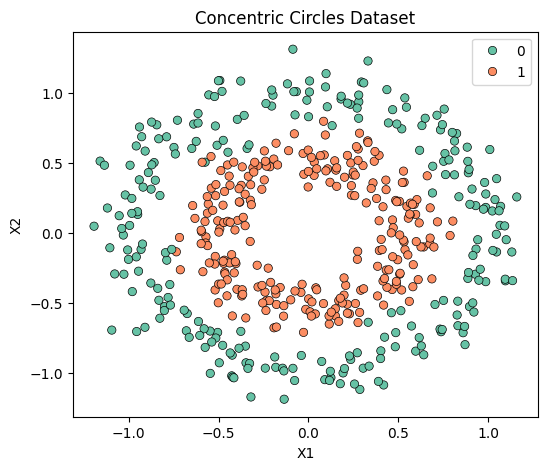

In [ ]:
# Visualize raw data
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set2", edgecolor='k')
plt.title("Concentric Circles Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### ✅ Preprocess (Standardize and Split)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## 🔹 2. Linear Model (No Hidden Layer)

In [ ]:
# Linear model: just input → output
linear_model = Sequential([
    InputLayer(shape=(2,)),
    Dense(1, activation='sigmoid')
])

linear_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
linear_model.summary()

E0000 00:00:1749656922.177593    2556 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1749656922.178011    2556 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

### ✅ Model Training

In [ ]:
# Train model
history_linear = linear_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=0
)

### ✅ Model Evaluation

In [ ]:
# Predict and evaluate
y_pred_linear = (linear_model.predict(X_test) > 0.5).astype("int32")
print("Linear Model Accuracy:", accuracy_score(y_test, y_pred_linear))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Linear Model Accuracy: 0.62


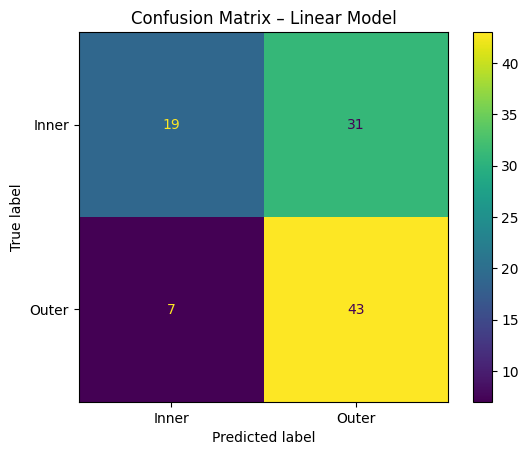

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_linear), display_labels=["Inner", "Outer"]).plot()
plt.title("Confusion Matrix – Linear Model")
plt.show()

### ✅ Visualize Decision Boundary

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 759us/step


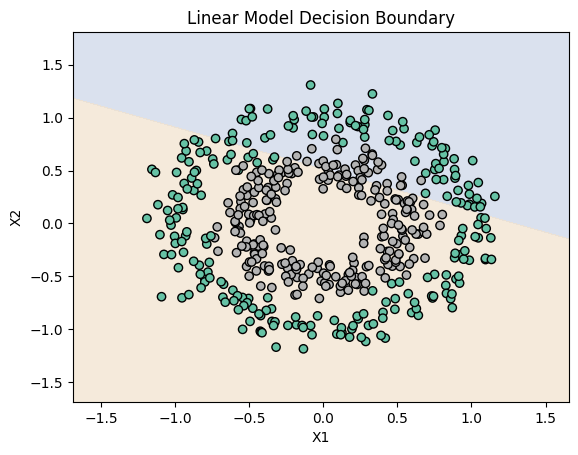

In [ ]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='Pastel2', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='Set2')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

plot_decision_boundary(linear_model, X, y, "Linear Model Decision Boundary")


## 🔹 3. MLP with ReLU (Hidden Layers)

In [ ]:
mlp_model = Sequential([
    InputLayer(shape=(2,)),
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

mlp_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

### ✅ Model Training

In [ ]:
history_mlp = mlp_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=0
)

### ✅ Evaluate + Compare Performance

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MLP Accuracy: 0.96


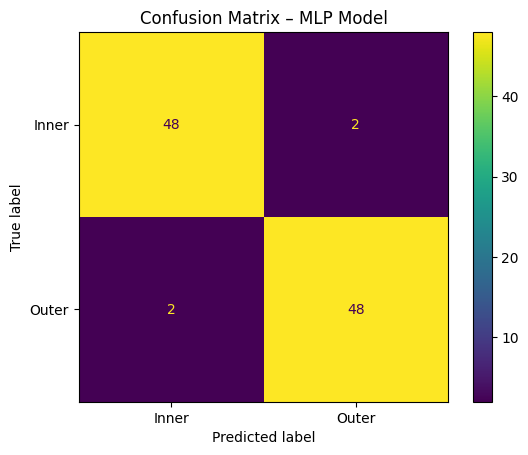

In [ ]:
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_mlp), display_labels=["Inner", "Outer"]).plot()
plt.title("Confusion Matrix – MLP Model")
plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


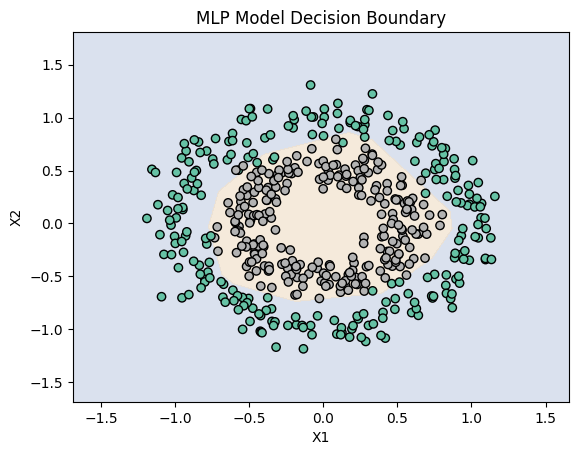

In [ ]:
plot_decision_boundary(mlp_model, X, y, "MLP Model Decision Boundary")

### ✅ Visualize Accuracy & Loss Curves

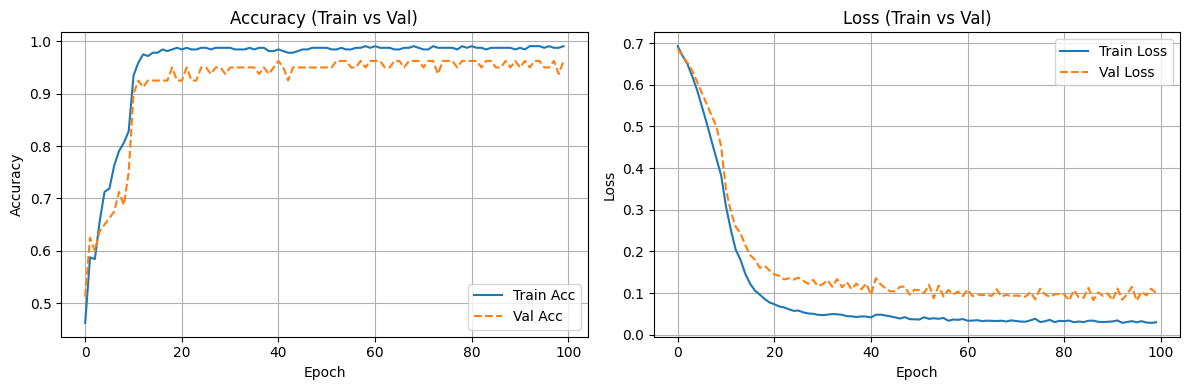

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy
axs[0].plot(history_mlp.history['accuracy'], label='Train Acc')
axs[0].plot(history_mlp.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title("Accuracy (Train vs Val)")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].grid(True)

# Loss
axs[1].plot(history_mlp.history['loss'], label='Train Loss')
axs[1].plot(history_mlp.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title("Loss (Train vs Val)")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## 🔹 4. Hidden Layers Without Activation (Still Linear!)

In [ ]:
# Model with 2 hidden layers but no activation functions
linear_hidden_model = Sequential([
    InputLayer(shape=(2,)),
    Dense(8, input_shape=(2,), activation=None),
    Dense(8, activation=None),
    Dense(1, activation='sigmoid')
])

linear_hidden_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

linear_hidden_model.summary()

/home/ai/miniconda3/envs/tfgp12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

### ✅ Model Training

In [ ]:
history_lin_hidden = linear_hidden_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=0
)

### ✅ Model Evaluation

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy (No Activation Hidden Layers): 0.61


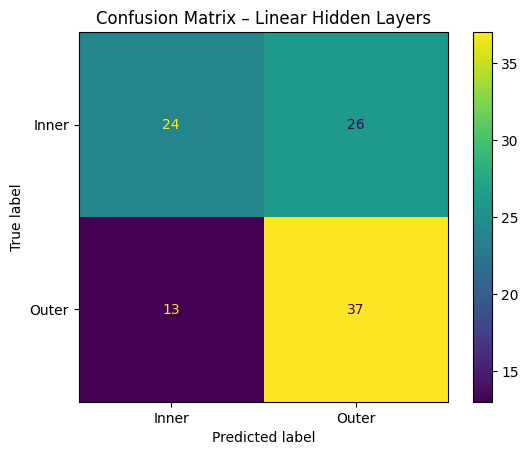

In [ ]:
# Evaluation
y_pred_lin_hidden = (linear_hidden_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy (No Activation Hidden Layers):", accuracy_score(y_test, y_pred_lin_hidden))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lin_hidden), display_labels=["Inner", "Outer"]).plot()
plt.title("Confusion Matrix – Linear Hidden Layers")
plt.show()

### ✅ Visualize Decision Boundary

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step


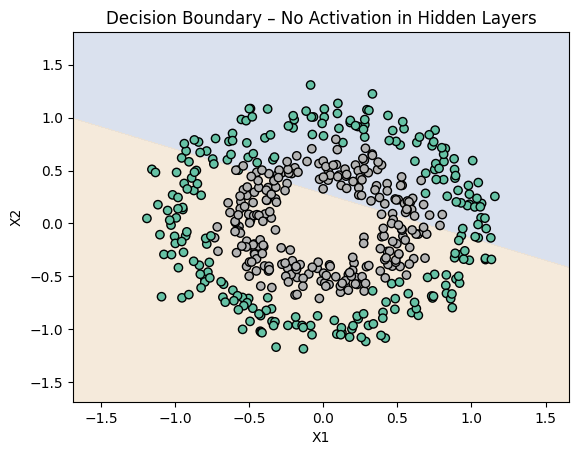

In [ ]:
# Decision boundary
plot_decision_boundary(linear_hidden_model, X, y, "Decision Boundary – No Activation in Hidden Layers")

## 🔹 5. Bonus Demo: Deeper MLP = More Capacity

In [ ]:
# Deeper model
deep_model = Sequential([
    InputLayer(shape=(2,)),
    Dense(16, input_shape=(2,), activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

deep_model.summary()

### ✅ Model Training

In [ ]:
history_deep = deep_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=0
)

### ✅ Model Evaluation

In [ ]:
# Evaluation
y_pred_deep = (deep_model.predict(X_test) > 0.5).astype("int32")
print("Accuracy (Deeper MLP):", accuracy_score(y_test, y_pred_deep))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_deep), display_labels=["Inner", "Outer"]).plot()
plt.title("Confusion Matrix – Deeper MLP")
plt.show()

In [ ]:
plot_decision_boundary(deep_model, X, y, "Decision Boundary – Deeper MLP")